# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [20]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import dates

# File to Load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [21]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

####  1. Get the total rides for each city type

In [22]:
# Get the total number of rides for each city type
total_rides=pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

#### 2. Get the total drivers for each city type

In [23]:
# Get the total number of drivers for each city type
total_drivers=city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

####  3. Get the total amount of fares for each city type

In [24]:
# Get the total fare for each city type
total_fare=pyber_data_df.groupby(["type"]).sum()["fare"]
total_fare

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

#### 4. Get the average fare per ride for each city type. 

In [25]:
# Group by city type to get the average fare
avg_fare = pyber_data_df.groupby(["type"]).mean()["fare"]
avg_fare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

#### 5. Get the average fare per driver for each city type. 

In [26]:
# Get the average fare per driver
avg_fare_driver = total_fare/total_drivers
avg_fare_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

####  6. Create a PyBer summary DataFrame. 

In [27]:
#
pyber_summary_df = pd.DataFrame({
    "Total Rides" : total_rides,
    "Total Drivers" : total_drivers,
    "Total Fares" : total_fare,
    "Average Fare per Ride" : avg_fare,
    "Average Fare per Driver" : avg_fare_driver})

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


####  7. Cleaning up the DataFrame. Delete the index name

In [28]:
pyber_summary_df.index.name = None

#### 8. Format the columns.

In [29]:
# Formatting the DataFrame

pyber_summary_df["Total Rides"]=pyber_summary_df["Total Rides"].map("{:,}".format)

pyber_summary_df["Total Drivers"]=pyber_summary_df["Total Drivers"].map("{:,}".format)

pyber_summary_df["Total Fares"]=pyber_summary_df["Total Fares"].map("${:,.2f}".format)

pyber_summary_df["Average Fare per Ride"]=pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)

pyber_summary_df["Average Fare per Driver"]=pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

#### 1. Read the merged DataFrame

#### 2. Using groupby() to create a new DataFrame showing the sum of the fares 
####  for each date where the indices are the city type and date.

In [30]:
# Creating a new dataframe and getting total fare groupby type and date
new_type_date_df = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
new_type_date_df.head()

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33

#### 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
#### df = df.reset_index()

In [31]:
# Reset the index
new_type_date_df = new_type_date_df.reset_index()
new_type_date_df.head()

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


#### 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
#### to get the total fares for each type of city by the date. 

In [32]:
# Creating pivot table with date as index, column as city type and values as fare
total_fares_pivot = new_type_date_df.pivot(index = "date", columns="type", values = "fare")
total_fares_pivot.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


#### 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

In [33]:
#Creating new data Frame for the dates '2019-01-01'to'2019-04-29'.
start_date = "2019-01-01"
end_date = "2019-04-29"
dates_loc_df=total_fares_pivot.loc[start_date:end_date]
dates_loc_df.tail()

type,Rural,Suburban,Urban
date,,,
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43
2019-04-28 17:38:09,NaN,34.87,NaN
2019-04-28 19:35:03,NaN,16.96,NaN


#### 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
#### df.index = pd.to_datetime(df.index)

In [34]:
# Set index value as datetime datatype 
dates_loc_df.index = pd.to_datetime(dates_loc_df.index)

#### 7. Check that the datatype for the index is datetime using df.info()

In [35]:
# Checking the index value
dates_loc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


#### 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

In [40]:
fare_sum_week_df = dates_loc_df.resample("W").sum()

#### 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

In [37]:
# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

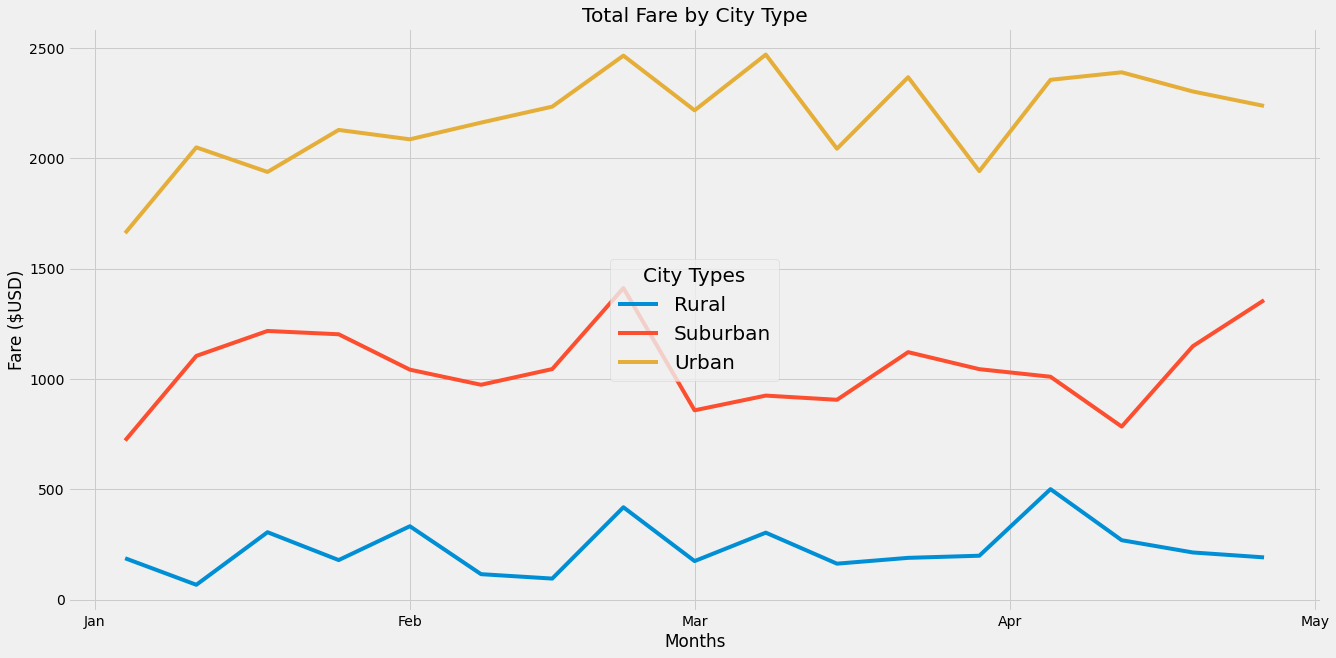

In [38]:
# Build the line chart based on the city
fig, ax = plt.subplots(figsize=(20, 10))
style.use('fivethirtyeight')

# Line chart for city type Rural
x = fare_sum_week_df.index
y = fare_sum_week_df['Rural']
ax.plot(x, y, label="Rural")

# Line chart for city type Suburban
x = fare_sum_week_df.index
y = fare_sum_week_df['Suburban']
ax.plot(x, y, label="Suburban")

# Line chart for city type Urban
x = fare_sum_week_df.index
y = fare_sum_week_df['Urban']
ax.plot(x, y, label="Urban")

# Incorporate the other graph properties
ax.set_title("Total Fare by City Type")
ax.set_ylabel("Fare ($USD)")
ax.set_xlabel("Months")

# Major ticks to change the month format
ax.xaxis.set_major_locator(dates.MonthLocator(bymonthday=3))
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))

# Add the legend.
plt.legend()
# Create a legend
lgnd = plt.legend(fontsize="20", mode="Expanded",
         scatterpoints=1, loc="center", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(20)

# Save the figure.
plt.savefig("analysis/PyBer_fare_summary.png")

# Show the plot
plt.show()